# Introduction

This notebook compares the test set performance of classifiers using term list scores based on the data-driven, RDoC, and DSM frameworks.

# Load the data

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import sys
sys.path.append("..")
import utilities

## Input parameters

In [2]:
metric = "mod" # Variable being compared between frameworks
n_iter = 1000 # Number of iterations for bootstrap distributions
frameworks = ["data-driven_k22", "data-driven", "rdoc", "dsm"]
clfs = ["_lr", "_lr", "", ""]
list_suffixes = ["", "", "_opsim", "_opsim"]
splits = ["discovery", "replication"]
suffix = "lr"

## Framework contents

In [3]:
lists, circuits = {}, {}
for fw, clf, list_suffix in zip(frameworks, clfs, list_suffixes):
    lists[fw], circuits[fw] = utilities.load_framework(fw, suffix=list_suffix, clf=clf)

## Observed values

In [4]:
obs = {}
for fw, clf in zip(frameworks, clfs):
    obs[fw] = pd.read_csv("data/{}_obs_{}{}.csv".format(metric, fw, clf), 
                                index_col=0, header=0)

In [5]:
obs["data-driven_k22"].loc[obs["data-driven_k22"]["SPLIT"] == "discovery"]["OBSERVED"].mean()

1.171995638600811

In [6]:
obs["data-driven_k22"].loc[obs["data-driven_k22"]["SPLIT"] == "replication"]["OBSERVED"].mean()

1.173989618561944

## Bootstrap distributions

In [7]:
boot, mean = {}, {}
for split in splits:
    boot[split], mean[split] = {}, {}
    for fw, clf in zip(frameworks, clfs):
        boot[split][fw] = pd.read_csv("data/{}_boot_{}{}_{}_{}iter.csv".format(metric, fw, clf, split, n_iter), 
                                index_col=0, header=0)
        mean[split][fw] = pd.read_csv("data/{}_mean_{}{}_{}.csv".format(metric, fw, clf, split), 
                                index_col=0, header=0)

In [8]:
boot["discovery"]["data-driven_k22"]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
RECALL,1.142206,1.149522,1.148761,1.147690,1.149564,1.145295,1.149734,1.148499,1.149077,1.148858,...,1.145486,1.151334,1.155967,1.146829,1.145930,1.146821,1.149456,1.142779,1.147300,1.149140
RETRIEVAL,1.141840,1.139151,1.139567,1.136248,1.141696,1.138162,1.143247,1.144661,1.133055,1.135214,...,1.130518,1.136026,1.132963,1.142224,1.144573,1.141339,1.144697,1.132839,1.150815,1.140274
EPISODIC_MEMORY,1.168690,1.168094,1.169322,1.172529,1.167675,1.170222,1.174480,1.171944,1.171096,1.169281,...,1.179057,1.167127,1.168026,1.168669,1.193904,1.166554,1.184584,1.160508,1.172616,1.177136
ENCODING,1.207670,1.202483,1.214248,1.213669,1.199829,1.221088,1.207725,1.200135,1.204642,1.196796,...,1.213582,1.194697,1.191736,1.204781,1.211024,1.203150,1.212892,1.209052,1.228740,1.191720
WORD,1.405353,1.368866,1.334787,1.370833,1.416505,1.370275,1.369865,1.324986,1.405412,1.360123,...,1.396260,1.407763,1.289057,1.325635,1.334170,1.404795,1.417680,1.299033,1.444633,1.323752
MEMORY,1.049248,1.042349,1.046537,1.048972,1.044767,1.036608,1.053482,1.048089,1.038261,1.043210,...,1.041865,1.038761,1.049802,1.044242,1.041815,1.049187,1.045036,1.048860,1.051776,1.055441
EMOTION,1.099590,1.094744,1.097060,1.093187,1.090974,1.099309,1.096532,1.098196,1.099675,1.094508,...,1.099266,1.100483,1.092098,1.107087,1.098221,1.099563,1.102514,1.096433,1.096742,1.092179
ANTICIPATION,1.127192,1.143828,1.130110,1.131743,1.134581,1.133493,1.131238,1.134599,1.113182,1.131648,...,1.129461,1.128476,1.128228,1.119670,1.128087,1.136636,1.120869,1.132043,1.135575,1.134655
REWARD,1.165536,1.135293,1.166800,1.172132,1.167974,1.170052,1.171412,1.148176,1.152914,1.142407,...,1.159920,1.170175,1.172027,1.161780,1.164398,1.177142,1.167186,1.161309,1.154343,1.119937
DECISION_MAKING,1.157839,1.154511,1.150798,1.171002,1.152028,1.163755,1.155590,1.170020,1.154425,1.145384,...,1.167698,1.152822,1.168463,1.176766,1.165886,1.159531,1.156153,1.153880,1.147002,1.149859


# Perform comparison tests

Is the mean of fw<sub>i</sub> greater than the mean of fw<sub>j</sub>?

In [9]:
from statsmodels.stats.multitest import multipletests

In [10]:
p, fdr = {}, {}
for split in splits:
    p[split] = np.empty((len(frameworks), len(frameworks)))
    for i, fw_i in enumerate(frameworks):
        for j, fw_j in enumerate(frameworks):
            boot_i = np.mean(boot[split][fw_i], axis=0)
            boot_j = np.mean(boot[split][fw_j], axis=0)
            p[split][i,j] = np.sum((boot_i - boot_j) <= 0.0) / float(n_iter)

    fdr[split] = multipletests(p[split].ravel(), method="fdr_bh")[1].reshape(p[split].shape)
    fdr[split] = pd.DataFrame(fdr[split], index=frameworks, columns=frameworks)
    
    print("-" * 65 + "\n" + split.upper() + "\n" + "-" * 65)
    print(fdr[split])
    print("")

-----------------------------------------------------------------
DISCOVERY
-----------------------------------------------------------------
                 data-driven_k22  data-driven  rdoc       dsm
data-driven_k22              1.0          0.0   0.0  0.000000
data-driven                  1.0          1.0   0.0  0.002667
rdoc                         1.0          1.0   1.0  1.000000
dsm                          1.0          1.0   0.0  1.000000

-----------------------------------------------------------------
REPLICATION
-----------------------------------------------------------------
                 data-driven_k22  data-driven  rdoc  dsm
data-driven_k22              1.0          0.0   0.0  0.0
data-driven                  1.0          1.0   0.0  1.0
rdoc                         1.0          1.0   1.0  1.0
dsm                          1.0          1.0   0.0  1.0



In [11]:
interval = 0.999
tail = (1.0 - interval) / 2.0 # Two-sided test
idx_lower = int(n_iter * tail)
idx_upper = int(n_iter * (1.0 - tail))

CI = {}
for split in splits:
    CI[split] = {}
    CI[split] = pd.DataFrame("", index=frameworks, columns=frameworks)
    for i, fw_i in enumerate(frameworks):
        for j, fw_j in enumerate(frameworks):
            boot_i = np.mean(boot[split][fw_i], axis=0)
            boot_j = np.mean(boot[split][fw_j], axis=0)
            boot_dif = np.sort(boot_i - boot_j)
            CI_lower = boot_dif[idx_lower]
            CI_upper = boot_dif[idx_upper]
            CI_sig = ""
            if (CI_lower > 0 and CI_upper > 0) or (CI_lower < 0 and CI_upper < 0):
                CI_sig = "*"
            CI[split].loc[fw_i,fw_j] = "{:.3f}, {:.3f} {}".format(CI_lower, CI_upper, CI_sig)
    
    print("-" * 65 + "\n" + split.upper() + "\n" + "-" * 65)
    print(CI[split])
    print("")

-----------------------------------------------------------------
DISCOVERY
-----------------------------------------------------------------
                  data-driven_k22       data-driven            rdoc  \
data-driven_k22     0.000, 0.000     0.034, 0.050 *  0.072, 0.087 *   
data-driven      -0.050, -0.034 *     0.000, 0.000   0.035, 0.042 *   
rdoc             -0.087, -0.072 *  -0.042, -0.035 *   0.000, 0.000    
dsm              -0.054, -0.038 *    -0.011, 0.000   0.027, 0.039 *   

                              dsm  
data-driven_k22    0.038, 0.054 *  
data-driven        -0.000, 0.011   
rdoc             -0.039, -0.027 *  
dsm                 0.000, 0.000   

-----------------------------------------------------------------
REPLICATION
-----------------------------------------------------------------
                  data-driven_k22       data-driven            rdoc  \
data-driven_k22     0.000, 0.000     0.074, 0.109 *  0.113, 0.145 *   
data-driven      -0.109, -0.074 *  

# Plot evaluation metrics

In [12]:
%matplotlib inline

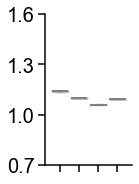

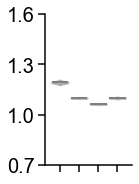

In [13]:
for split in splits:
    utilities.plot_framework_comparison(boot[split], obs, mean[split], metric=metric, w=1.2,
                                        n_iter=n_iter, suffix="k09_" + suffix + "_" + split, 
                                        ylim=[0.7,1.6], yticks=[0.7,1,1.3,1.6])